In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head(4)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df.shape

(267, 9)

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [12]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

### updating column names


In [13]:
df.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']

In [14]:
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Changing the data type of date attribute

In [15]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

### Extracting month from the date attribute

In [16]:
df['month_int']=df['date'].dt.month
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


<AxesSubplot:>

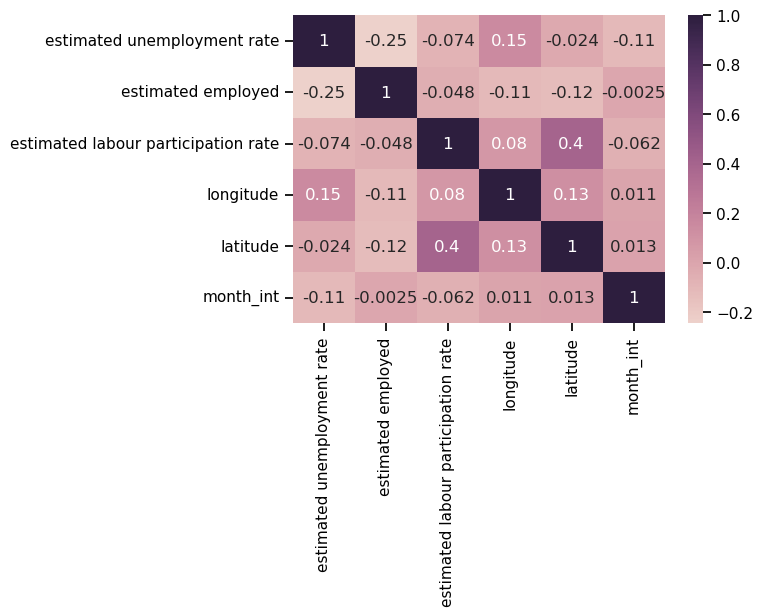

In [17]:
heatmap= df[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'longitude', 'latitude', 'month_int']]
heatmap = heatmap.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

### Unemployment Rate Analysis: Data Visualization

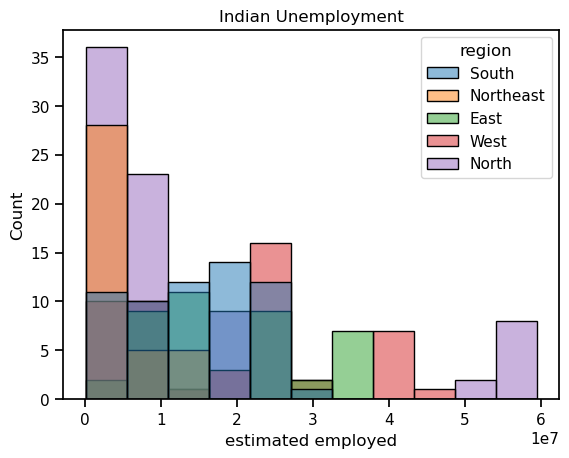

In [18]:
#The estimated number of employees according to different regions of India:
df.columns= ["state","date","frequency",
               "estimated unemployment rate","estimated employed",
               "estimated labour participation rate","region",
               "longitude","latitude","month_int"]
plt.title("Indian Unemployment")
sns.histplot(x="estimated employed", hue="region", data=df)
plt.show()

### The unemployment rate according to different regions of India

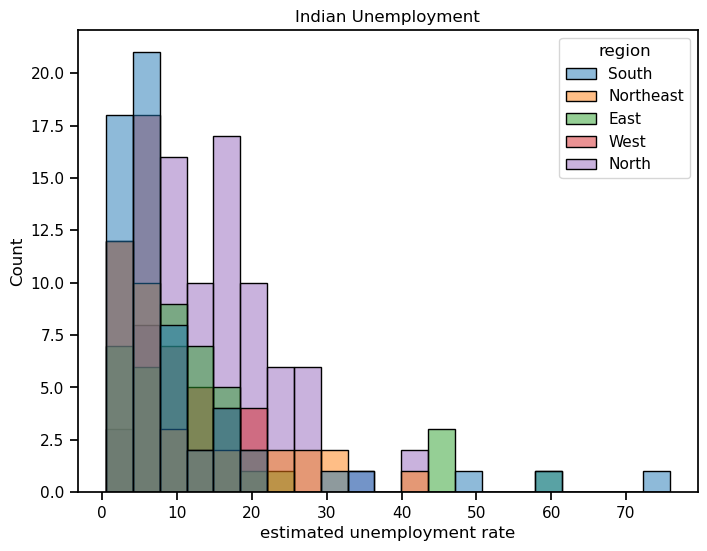

In [19]:
plt.figure(figsize=(8, 6))
plt.title("Indian Unemployment")
sns.histplot(x="estimated unemployment rate", hue="region", data=df)
plt.show()

In [20]:
#Boxplot of Unemployment rate per States
fig = px.box(df, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [21]:
#Scatter matrix showing relationships between unemployment rate, employment, and labor participation rate, color-coded by region.
fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='region')
fig.show()

In [22]:
#Bar chart displaying the average unemployment rate in each state, color-coded by state.
plot_ump = df[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [23]:
#Let’s create a dashboard to analyze the unemployment rate of each Indian state by region.
unemploment = df[["state", "region", "estimated unemployment rate"]]
figure = px.sunburst(unemploment, path=["region", "state"], 
                     values="estimated unemployment rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [24]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month_int",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [25]:
#data representation before and after the lockdown
after_lockdown = df[(df['month_int'] >= 4) & (df['month_int'] <=6)]
before_lockdown = df[(df['month_int'] >= 1) & (df['month_int'] <=4)]

In [26]:
af_lockdown=after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,9.4025,13.750000
1,Assam,6.2250,7.070000
2,Bihar,20.7425,36.806667
3,Chhattisgarh,7.2450,9.380000
4,Delhi,17.6975,25.713333


In [27]:
#Unemployment rate change after lockdown
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [28]:
fig = px.bar(lockdown, x='state', y='rate change in unemployment', color='rate change in unemployment',
             title='Percentage change in unemployment rate in each state after lockdown', template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

## Most impacted states with unemployment during lockdown are :

### 1.Tripura
### 2.Haryana
### 3.Bihar
### 4.Puducherry
### 5.Jharkand